In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('/content/survey.csv')
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [4]:
#checking for misssing values
df.isnull().sum()

,0
Timestamp,0
Age,0
Gender,0
Country,0
state,515
self_employed,18
family_history,0
treatment,0
work_interfere,264
no_employees,0


In [5]:
# Drop high-null and irrelevant columns
df = df.drop(columns=['comments', 'state','Timestamp'])

In [6]:
#checking duplicate values
df.duplicated().sum()

np.int64(4)

In [7]:
#removing duplicates
df.drop_duplicates(inplace=True)

In [8]:
#filling missing values
df['work_interfere'] = df['work_interfere'].fillna(df['work_interfere'].mode()[0])
df['self_employed'] = df['self_employed'].fillna(df['self_employed'].mode()[0])

In [9]:
df.describe()

,Age
count,1.255000e+03
mean,7.968131e+07
std,2.822787e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


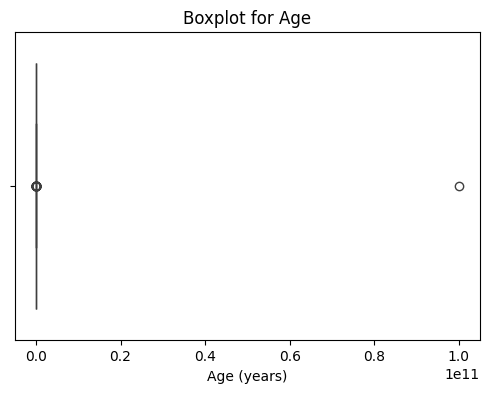

In [10]:
#box plot for outliers in age
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Age'])
plt.title('Boxplot for Age')
plt.xlabel('Age (years)')
plt.show()

In [11]:
# removing outliers in age
df = df[(df['Age'] >= 15) & (df['Age'] <= 100)]

In [12]:
df['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'Enby', 'fluid',
       'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'Malr', 'femail',
       'Cis Man', 'ostensibly male, unsure what that really means'],
      dtype=object)

In [13]:
# grouping gender categories
def clean_gender(gender):
    gender = str(gender).strip().lower()

    male_terms = [
        'm', 'male', 'cis male', 'male-ish', 'mal', 'male (cis)', 'cis man',
        'man', 'msle', 'malr', 'mail', 'maile', 'make'
    ]

    female_terms = [
        'f', 'female', 'cis female', 'woman', 'femake', 'femail', 'female ',
        'cis-female/femme', 'female (cis)', 'female (trans)', 'trans-female',
        'trans woman'
    ]

    # Everything else is treated as 'Other'
    if gender in male_terms:
        return 'Male'
    elif gender in female_terms:
        return 'Female'
    else:
        return 'Others'

In [14]:
# Apply function
df['Gender'] = df['Gender'].apply(clean_gender)

# Check result
print(df['Gender'].value_counts())

Gender
Male      982
Female    251
Others     14
Name: count, dtype: int64


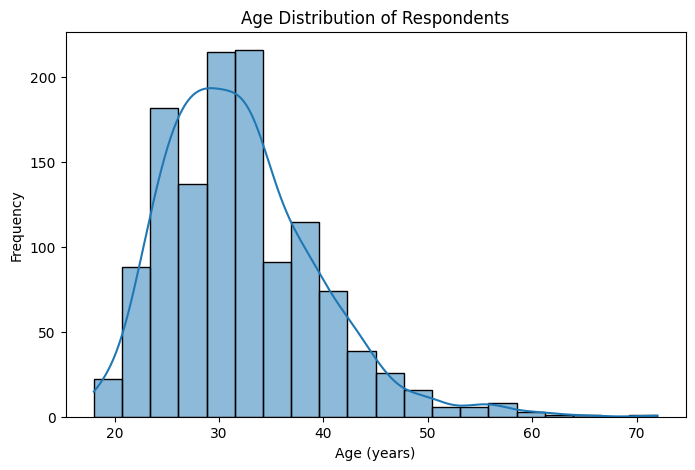

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution of Respondents')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.show()

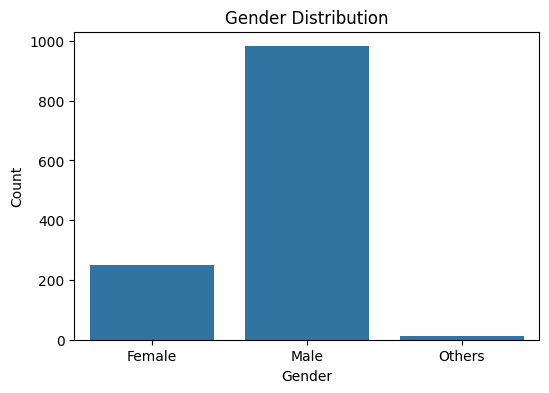

In [16]:
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

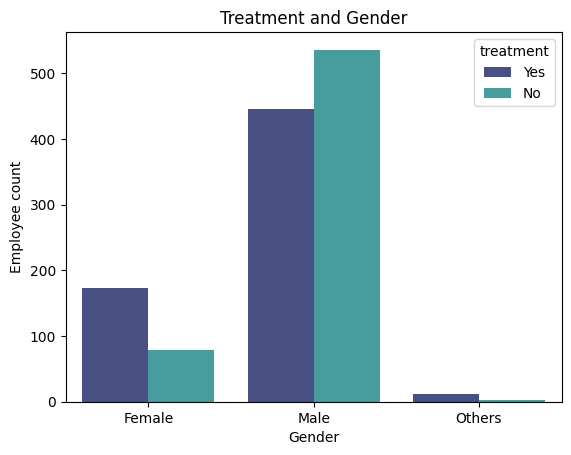

In [17]:
# plot for treatment vs Gender
sns.countplot(data=df,x='Gender',hue='treatment',palette='mako')
plt.title('Treatment and Gender')
plt.xlabel('Gender')
plt.ylabel('Employee count')
plt.show()

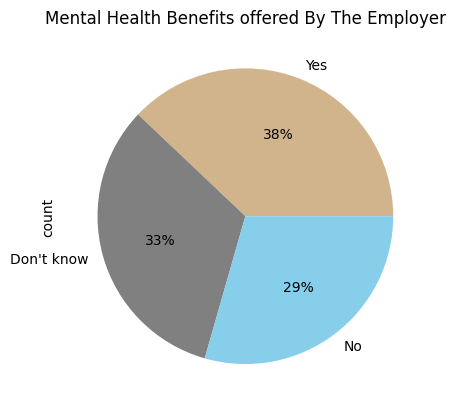

In [18]:
# pie chart for Mental Health Benefits offered By The Employer
df['benefits'].value_counts().plot(kind='pie',autopct='%1.0f%%',colors=['tan','gray','skyblue'])
plt.title('Mental Health Benefits offered By The Employer')
plt.show()

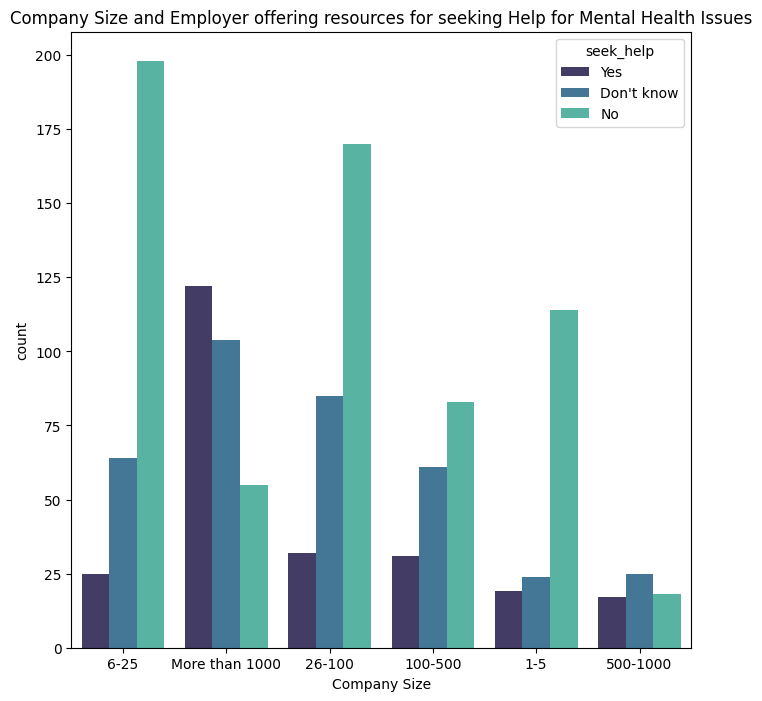

In [19]:
#plot for companysize vs resources for seeking help
plt.figure(figsize=(8,8))
sns.countplot(data=df,x='no_employees',hue='seek_help',palette='mako')
plt.title('Company Size and Employer offering resources for seeking Help for Mental Health Issues')
plt.xlabel('Company Size')
plt.ylabel('count')
plt.show()

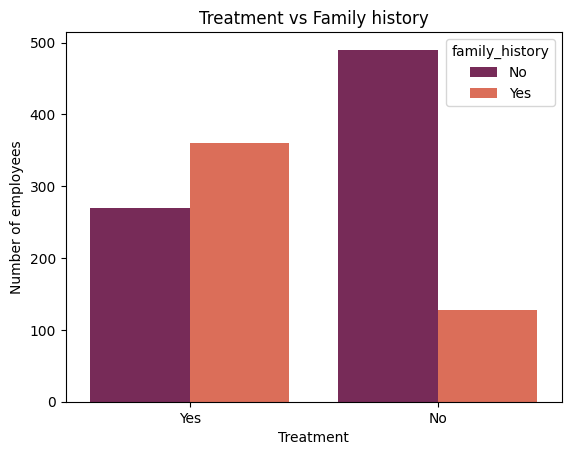

In [20]:
# plot for treatment vs Family history
sns.countplot(data=df,x='treatment',hue='family_history',palette='rocket')
plt.title('Treatment vs Family history')
plt.xlabel('Treatment')
plt.ylabel('Number of employees')
plt.show()

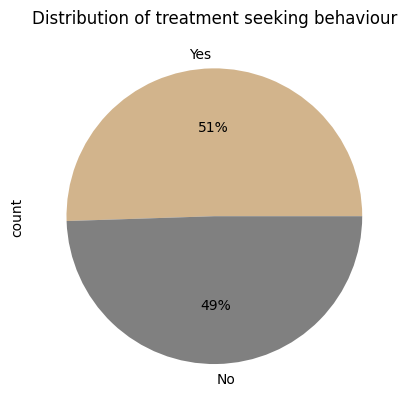

In [21]:
# pie chart for treatment
df['treatment'].value_counts().plot(kind='pie',autopct='%1.0f%%',colors=['tan','gray'])
plt.title('Distribution of treatment seeking behaviour')
plt.show()

In [22]:
df['Country'].unique()

array(['United States', 'Canada', 'United Kingdom', 'Bulgaria', 'France',
       'Portugal', 'Netherlands', 'Switzerland', 'Poland', 'Australia',
       'Germany', 'Russia', 'Mexico', 'Brazil', 'Slovenia', 'Costa Rica',
       'Austria', 'Ireland', 'India', 'South Africa', 'Italy', 'Sweden',
       'Colombia', 'Latvia', 'Romania', 'Belgium', 'New Zealand', 'Spain',
       'Finland', 'Uruguay', 'Israel', 'Bosnia and Herzegovina',
       'Hungary', 'Singapore', 'Japan', 'Nigeria', 'Croatia', 'Norway',
       'Thailand', 'Denmark', 'Greece', 'Moldova', 'Georgia', 'China',
       'Czech Republic', 'Philippines'], dtype=object)

In [23]:
#grouping countries into region
region_map = {
    # North America
    'United States': 'North America', 'Canada': 'North America', 'Mexico': 'North America',
    'Costa Rica': 'North America', 'Uruguay': 'South America', 'Brazil': 'South America',
    'Colombia': 'South America',

    # Europe
    'United Kingdom': 'Europe', 'Bulgaria': 'Europe', 'France': 'Europe',
    'Portugal': 'Europe', 'Netherlands': 'Europe', 'Switzerland': 'Europe',
    'Poland': 'Europe', 'Germany': 'Europe', 'Slovenia': 'Europe', 'Austria': 'Europe',
    'Ireland': 'Europe', 'Italy': 'Europe', 'Sweden': 'Europe', 'Latvia': 'Europe',
    'Romania': 'Europe', 'Belgium': 'Europe', 'Spain': 'Europe', 'Finland': 'Europe',
    'Bosnia and Herzegovina': 'Europe', 'Hungary': 'Europe', 'Croatia': 'Europe',
    'Norway': 'Europe', 'Denmark': 'Europe', 'Greece': 'Europe', 'Moldova': 'Europe',
    'Georgia': 'Europe', 'Czech Republic': 'Europe',

    # Asia
    'Russia': 'Asia', 'Israel': 'Asia', 'Singapore': 'Asia', 'Japan': 'Asia',
    'Thailand': 'Asia', 'China': 'Asia', 'Philippines': 'Asia', 'India': 'Asia',

    # Oceania
    'Australia': 'Oceania', 'New Zealand': 'Oceania',

    # Africa
    'South Africa': 'Africa', 'Nigeria': 'Africa'
}

# Map countries to regions
df['Region'] = df['Country'].map(region_map)

# If there are countries not in the mapping, fill them as 'Other'
df['Region'] = df['Region'].fillna('Other')

# Drop original Country column
df.drop(columns=['Country'], inplace=True)


In [24]:
# removing others gender category
df=df[df['Gender']!='Others']


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1233 entries, 0 to 1258
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1233 non-null   int64 
 1   Gender                     1233 non-null   object
 2   self_employed              1233 non-null   object
 3   family_history             1233 non-null   object
 4   treatment                  1233 non-null   object
 5   work_interfere             1233 non-null   object
 6   no_employees               1233 non-null   object
 7   remote_work                1233 non-null   object
 8   tech_company               1233 non-null   object
 9   benefits                   1233 non-null   object
 10  care_options               1233 non-null   object
 11  wellness_program           1233 non-null   object
 12  seek_help                  1233 non-null   object
 13  anonymity                  1233 non-null   object
 14  leave        

In [26]:
# creating support score
df['support_score'] = (
    (df['benefits'].map({'Yes': 1, "Don't know": 0, 'No': 0})) +
    (df['care_options'].map({'Yes': 1, 'Not sure': 0, 'No': 0})) +
    (df['wellness_program'].map({'Yes': 1, "Don't know": 0, 'No': 0}))+
    (df['seek_help'].map({'Yes': 1, "Don't know": 0, 'No': 0}))
)
df['support_score']

,support_score
0,2
1,0
2,0
3,1
4,1
...,...
1254,0
1255,2
1256,2
1257,1


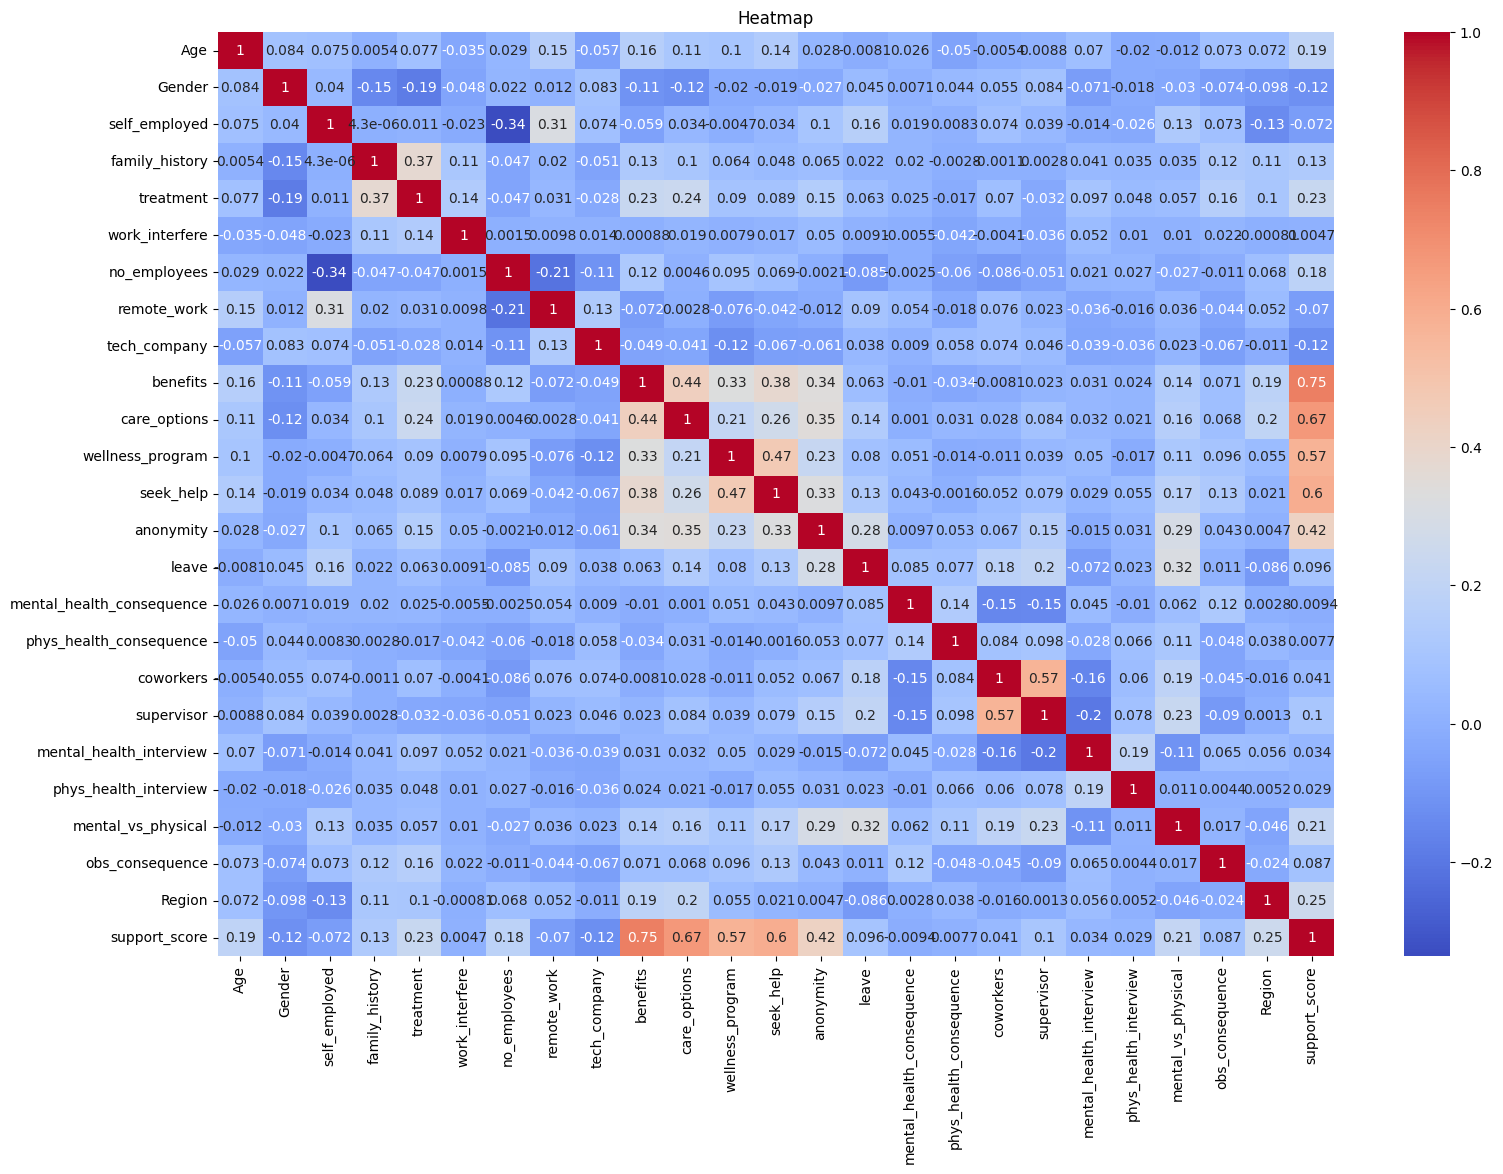

In [27]:
#label encode for heat map
df1=df.copy()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df1.select_dtypes(include=['object']).columns:
    df1[col] = le.fit_transform(df1[col].astype(str))

# Plot heatmap
plt.figure(figsize=(18, 12))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap")
plt.show()


In [28]:
print(df.columns)


Index(['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'Region', 'support_score'],
      dtype='object')


In [29]:
# One-hot encode categorical variables
data_encoded = pd.get_dummies(df, columns=['Gender', 'self_employed', 'family_history', 'treatment',
                                           'work_interfere', 'no_employees', 'remote_work', 'tech_company',
                                           'benefits', 'care_options', 'wellness_program', 'seek_help',
                                           'anonymity', 'leave', 'mental_health_consequence',
                                           'phys_health_consequence', 'coworkers', 'supervisor',
                                           'mental_health_interview', 'phys_health_interview',
                                           'mental_vs_physical', 'obs_consequence', 'Region'], drop_first=True)

# Target variable
target = 'treatment_Yes'

# Drop target column from features
X = data_encoded.drop(columns=[target])
y = data_encoded[target]

print("Feature shape:", X.shape)
print("Target shape:", y.shape)

Feature shape: (1233, 49)
Target shape: (1233,)


In [30]:
from sklearn.model_selection import train_test_split
X = data_encoded.drop('treatment_Yes', axis=1)  # Features
y = data_encoded['treatment_Yes']  # Target

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the split
print(X_train.shape, X_test.shape)

(986, 49) (247, 49)


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize the models
lr_model = LogisticRegression(penalty='l2',solver='lbfgs', max_iter=500, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100,max_depth=None,random_state=42)
svm_model = SVC(C=1.0,gamma='scale',probability=True, random_state=42)
xgb_model = XGBClassifier(n_estimators=100,learning_rate=0.1,use_label_encoder=False,eval_metric='logloss',random_state=42)

# Train the models
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Predict using the models
lr_pred = lr_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
svm_pred = svm_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)

# Evaluate the models
print(f"Logistic Regression - Accuracy: {accuracy_score(y_test, lr_pred):.4f}")
print(f"Random Forest - Accuracy: {accuracy_score(y_test, rf_pred):.4f}")
print(f"SVM - Accuracy: {accuracy_score(y_test, svm_pred):.4f}")
print(f"XGBoost - Accuracy: {accuracy_score(y_test, xgb_pred):.4f}")

# Precision, Recall, F1-Score
models = {'Logistic Regression': lr_pred, 'Random Forest': rf_pred, 'SVM': svm_pred, 'XGBoost': xgb_pred}
for model_name, pred in models.items():
    print(f"{model_name} - Precision: {precision_score(y_test, pred):.4f}")
    print(f"{model_name} - Recall: {recall_score(y_test, pred):.4f}")
    print(f"{model_name} - F1-Score: {f1_score(y_test, pred):.4f}")


Logistic Regression - Accuracy: 0.7166
Random Forest - Accuracy: 0.6923
SVM - Accuracy: 0.6113
XGBoost - Accuracy: 0.7004
Logistic Regression - Precision: 0.7258
Logistic Regression - Recall: 0.7143
Logistic Regression - F1-Score: 0.7200
Random Forest - Precision: 0.7016
Random Forest - Recall: 0.6905
Random Forest - F1-Score: 0.6960
SVM - Precision: 0.6562
SVM - Recall: 0.5000
SVM - F1-Score: 0.5676
XGBoost - Precision: 0.7203
XGBoost - Recall: 0.6746
XGBoost - F1-Score: 0.6967


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:15:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


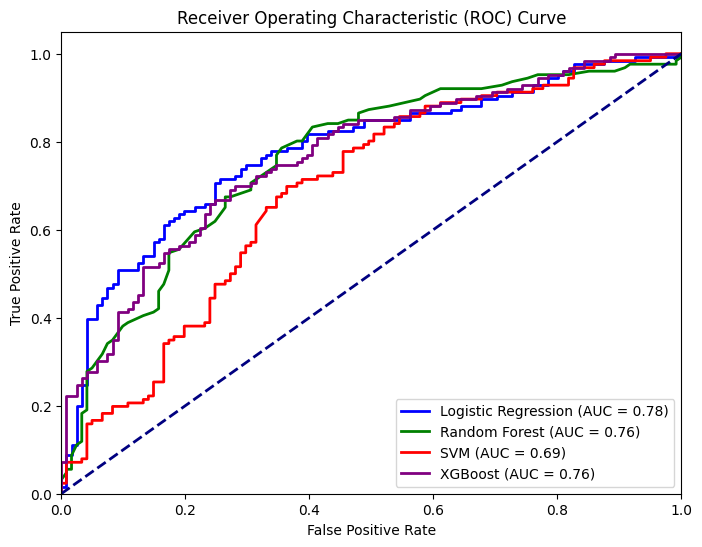

In [32]:
from sklearn.metrics import roc_curve, auc

# Get the probabilities for the positive class
lr_prob = lr_model.predict_proba(X_test)[:, 1]
rf_prob = rf_model.predict_proba(X_test)[:, 1]
svm_prob = svm_model.predict_proba(X_test)[:, 1]
xgb_prob = xgb_model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve for each model
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_prob)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_prob)
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_prob)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_prob)

# Calculate AUC (Area Under Curve)
roc_auc_lr = auc(fpr_lr, tpr_lr)
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_svm = auc(fpr_svm, tpr_svm)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot ROC Curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot(fpr_xgb, tpr_xgb, color='purple', lw=2, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')

# Formatting the plot
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


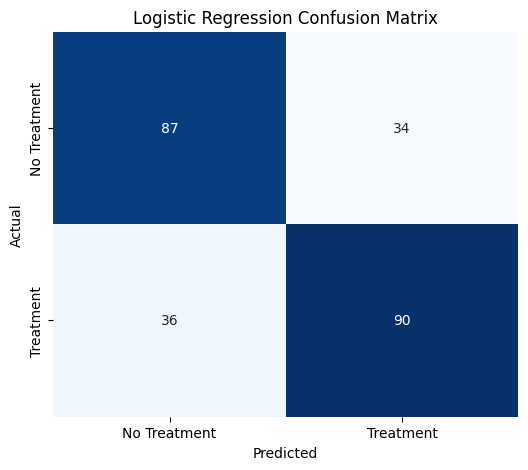

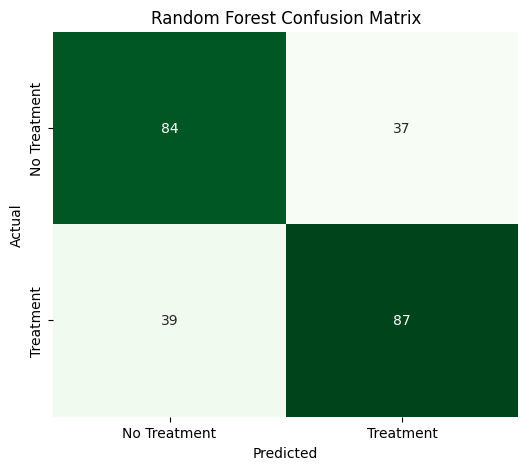

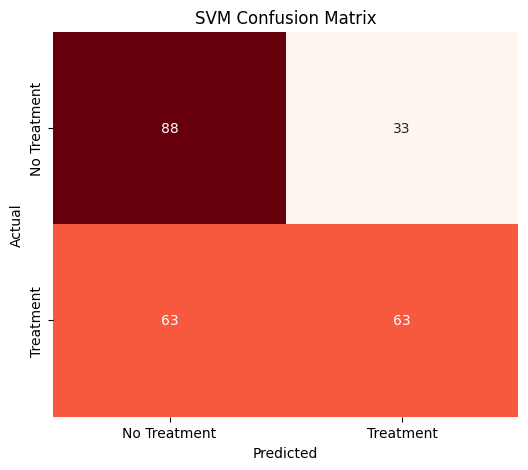

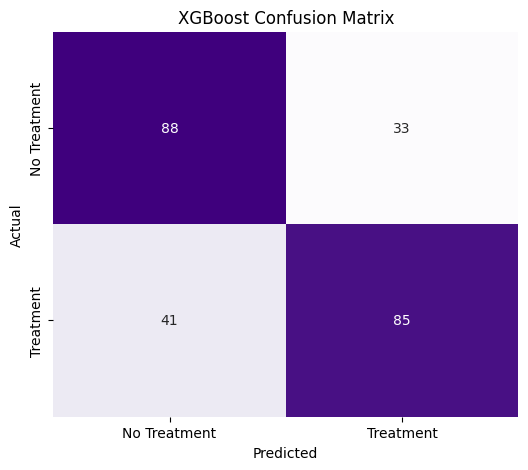

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix for each model
cm_lr = confusion_matrix(y_test, lr_pred)
cm_rf = confusion_matrix(y_test, rf_pred)
cm_svm = confusion_matrix(y_test, svm_pred)
cm_xgb = confusion_matrix(y_test, xgb_pred)

# Plot confusion matrix for Logistic Regression
plt.figure(figsize=(6, 5))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Treatment', 'Treatment'],
            yticklabels=['No Treatment', 'Treatment'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot confusion matrix for Random Forest
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['No Treatment', 'Treatment'],
            yticklabels=['No Treatment', 'Treatment'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot confusion matrix for SVM
plt.figure(figsize=(6, 5))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=['No Treatment', 'Treatment'],
            yticklabels=['No Treatment', 'Treatment'])
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot confusion matrix for XGBoost
plt.figure(figsize=(6, 5))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Purples', cbar=False,
            xticklabels=['No Treatment', 'Treatment'],
            yticklabels=['No Treatment', 'Treatment'])
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [34]:
print(f"Logistic Regression AUC: {roc_auc_lr:.4f}")
print(f"Random Forest AUC: {roc_auc_rf:.4f}")
print(f"SVM AUC: {roc_auc_svm:.4f}")
print(f"XGBoost AUC: {roc_auc_xgb:.4f}")

Logistic Regression AUC: 0.7786
Random Forest AUC: 0.7617
SVM AUC: 0.6872
XGBoost AUC: 0.7647


In [35]:
#tuning the best 2 models
#logistic regression hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Logistic Regression hyperparameter grid
lr_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear'],
    'penalty': ['l2']
}

lr_grid = GridSearchCV(LogisticRegression(max_iter=500, random_state=42),
                       param_grid=lr_param_grid,
                       scoring='roc_auc',
                       cv=5,
                       n_jobs=-1)
lr_grid.fit(X_train, y_train)

# Best parameters and score
print("Best LR parameters:", lr_grid.best_params_)
print("Best LR ROC-AUC:", lr_grid.best_score_)

# Predict with best estimator
lr_best = lr_grid.best_estimator_
lr_prob = lr_best.predict_proba(X_test)[:,1]

Best LR parameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best LR ROC-AUC: 0.8316629498447681


In [36]:
#xgboost hyperparameter tuning
from sklearn.model_selection import GridSearchCV
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1]
}

xgb_grid = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
                        param_grid=xgb_param_grid,
                        scoring='roc_auc',
                        cv=5,
                        n_jobs=-1)
xgb_grid.fit(X_train, y_train)

# Best parameters and score
print("Best XGB parameters:", xgb_grid.best_params_)
print("Best XGB ROC-AUC:", xgb_grid.best_score_)

# Predict with best estimator
xgb_best = xgb_grid.best_estimator_
xgb_prob = xgb_best.predict_proba(X_test)[:,1]


Best XGB parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best XGB ROC-AUC: 0.8265576815360365


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:16:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


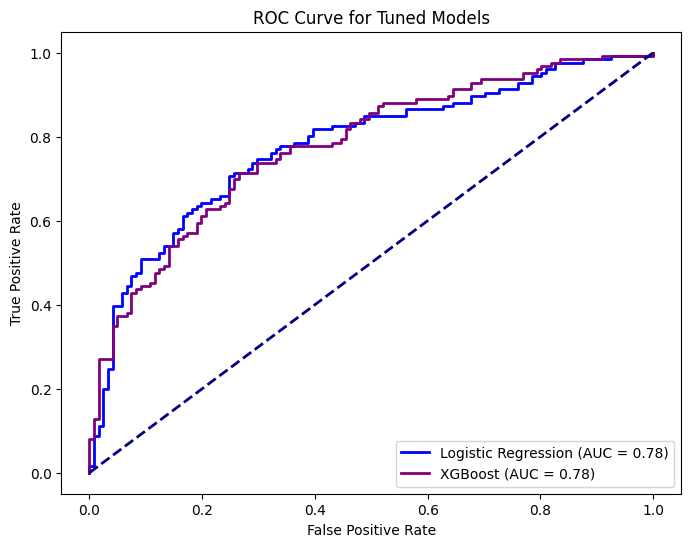

In [37]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Logistic Regression ROC
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_prob)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# XGBoost ROC
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_prob)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot ROC curves
plt.figure(figsize=(8,6))
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_xgb, tpr_xgb, color='purple', lw=2, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Tuned Models')
plt.legend(loc='lower right')
plt.show()


In [38]:
# Evaluate tuned Logistic Regression
lr_best_pred = lr_best.predict(X_test)

print("Tuned Logistic Regression")
print("Accuracy:", accuracy_score(y_test, lr_best_pred))
print("Precision:", precision_score(y_test, lr_best_pred))
print("Recall:", recall_score(y_test, lr_best_pred))
print("F1 Score:", f1_score(y_test, lr_best_pred))

# Evaluate tuned XGBoost
xgb_best_pred = xgb_best.predict(X_test)

print("Tuned XGBoost")
print("Accuracy:", accuracy_score(y_test, xgb_best_pred))
print("Precision:", precision_score(y_test, xgb_best_pred))
print("Recall:", recall_score(y_test, xgb_best_pred))
print("F1 Score:", f1_score(y_test, xgb_best_pred))

Tuned Logistic Regression
Accuracy: 0.7165991902834008
Precision: 0.7258064516129032
Recall: 0.7142857142857143
F1 Score: 0.72
Tuned XGBoost
Accuracy: 0.7246963562753036
Precision: 0.7377049180327869
Recall: 0.7142857142857143
F1 Score: 0.7258064516129032


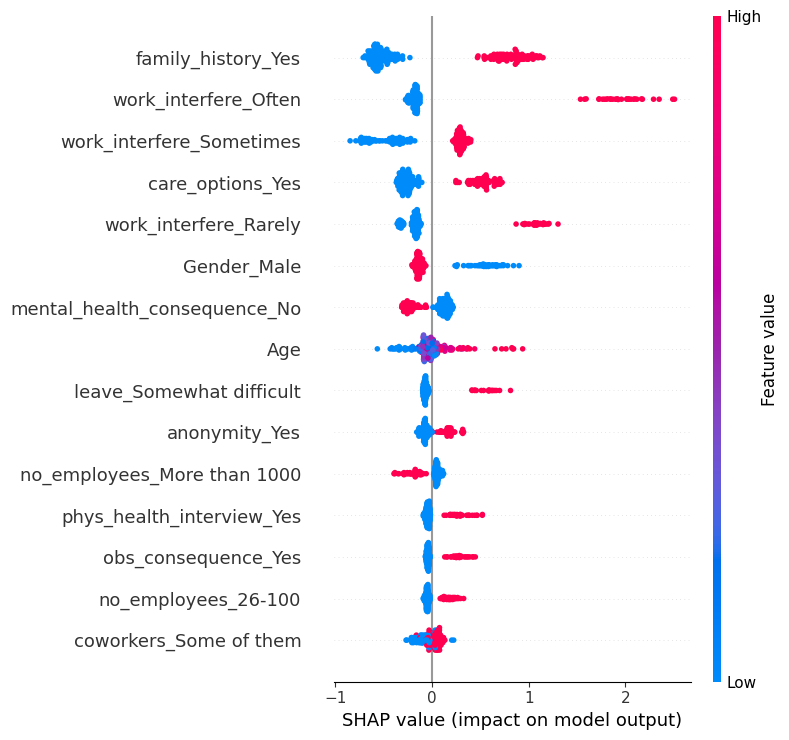

In [39]:
import shap

# Explain the XGBoost model using SHAP
explainer = shap.TreeExplainer(xgb_best)
shap_values = explainer.shap_values(X_test)

# Plot SHAP values
shap.summary_plot(shap_values, X_test,max_display=15)